In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns

In [8]:
customer_list=pd.read_excel('C:/Users/Mr.Xiao/Desktop/KPMG_VI_New_raw_data_update_final.xlsx',2,skiprows=[0])

In [9]:
customer_list.drop(['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'],axis=1,inplace=True)
customer_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [77]:
customer_list['year']=pd.to_datetime(customer_list['DOB']).dt.year

In [6]:
customer_segment=customer_list.groupby(['state','wealth_segment']).size()

In [7]:
customer_segment=pd.DataFrame(customer_segment)
customer_segment.rename(columns={0:'Amount'})
customer_segment=customer_segment.groupby(by='state').apply(lambda x:round((x/x.sum())*100,2))
customer_segment.groupby(by='state').apply(lambda x:x.sort_values(0,ascending=False))
#Prompt: In VIC state, the percentage of high net worth customer is more than other two states, which is a key area to improve the quality of severce

0
state state wealth_segment          
NSW   NSW   Mass Customer      51.58
            High Net Worth     25.30
            Affluent Customer  23.12
QLD   QLD   Mass Customer      53.51
            Affluent Customer  23.68
            High Net Worth     22.81
VIC   VIC   Mass Customer      46.99
            High Net Worth     26.69
            Affluent Customer  26.32

Job

In [8]:
customer_list.groupby(['job_industry_category']).mean()
job_category=pd.DataFrame(customer_list.groupby(['job_industry_category']).size())
job_category['value']=customer_list.groupby(['job_industry_category'])['Value'].mean()
job_category=job_category.rename(columns={0:'Amount'})
job_category.sort_values(by='value',ascending=False)
#Prompts: The job category in agriculture, retail and property might represent higher customer value
#The amount of customers in Manufacutring and Financial industry are the most

,Amount,value
job_industry_category,,
Argiculture,26,0.914516
Retail,78,0.914416
Property,64,0.910526
Manufacturing,199,0.889735
Financial Services,203,0.877242
Entertainment,37,0.861274
Health,152,0.847639
IT,51,0.843828
Telecommunications,25,0.842322


Year

In [9]:
customer_list['year']=2022-customer_list['year']
customer_list['year']

0      65.0
1      52.0
2      48.0
3      43.0
4      57.0
       ... 
995    63.0
996    21.0
997    68.0
998    70.0
999    67.0
Name: year, Length: 1000, dtype: float64

In [10]:
X=np.array(customer_list['Value'])
Y=np.array(customer_list['year'])
np.corrcoef(X,Y)


array([[ 1., nan],
       [nan, nan]])

Ownership of car and category of customer

In [11]:
data=customer_list.groupby(['owns_car','wealth_segment']).size()
arr1=[]
arr2=[]
dataset=[]
for index,i in enumerate(data.values):
    if index<=2:
        arr1.append(i)
    else:
        arr2.append(i)
dataset.append(arr1)
dataset.append(arr2)
dataset

[[116, 137, 254], [125, 114, 254]]

In [68]:
categroy_table=pd.DataFrame(dataset,index=['No','Yes'],columns=['Affluent','Mass','High'])

NameError: name 'dataset' is not defined

In [13]:
chi=chi2_contingency(categroy_table)
print('Chi_Square value=%.4f, p-value=%.4f, degree of freedom=%i expected_frep=%s'%chi)
#The output can not reject the null hypothesis, thus, we have no enough evidence to conclude that there is correlationship between ownership of car and customer value

Chi_Square value=2.2481, p-value=0.3250, degree of freedom=2 expected_frep=[[122.187 127.257 257.556]
 [118.813 123.743 250.444]]


Transaction

In [2]:
transaction=pd.read_excel('C:/Users/Mr.Xiao/Desktop/KPMG_VI_New_raw_data_update_final.xlsx',1,skiprows=[0])
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


Product line

In [126]:
transaction['profit']=transaction['list_price']-transaction['standard_cost']

In [134]:
transaction_clear=transaction[~transaction['standard_cost'].isnull()]

F-Value is 965.10，P-value is 0.00


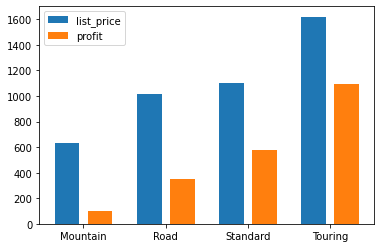

In [149]:
productlinedf=transaction_clear.groupby(['product_line']).agg({'list_price':'mean','profit':'mean','transaction_id':'count'})
productlinedf.rename(columns={'transaction_id':'Amount'},inplace=True)
productlinedf2=productlinedf.round(2).sort_values(by='list_price')
productlinedf2

x=productlinedf2['list_price']
y=productlinedf2['profit']


series=range(4)
name=['Mountain', 'Road', 'Standard','Touring']
_=plt.bar(x=[i - 0.2 for i in series],height=x,width=0.3,align='center',label='list_price')
_=plt.bar(x=[i + 0.2 for i in series],height=y,width=0.3,align='center',label='profit')
_=plt.legend()
_=plt.xticks(series,name)

F,P=stats.f_oneway(
    pd.DataFrame(transaction_clear[transaction_clear['product_line']=='Mountain']['profit']),
    pd.DataFrame(transaction_clear[transaction_clear['product_line']=='Road']['profit']),
    pd.DataFrame(transaction_clear[transaction_clear['product_line']=='Standard']['profit']),
    pd.DataFrame(transaction_clear[transaction_clear['product_line']=='Touring']['profit'])
)
F_test = stats.f.ppf((1-0.05), 4, 14175) 
print('F-Value is %.2f，P-value is %.2f' % (F,P))  



#The touring product line enable creating the maximun profit, while market of mountain bike is the smallest and per value is lowest, which is required to be updated

online_order

In [21]:
transaction.groupby(['online_order']).agg({'list_price':'mean','transaction_id':'count'}) 
#There is no significantly difference on mean of price and amount of order between online and offline

,list_price,transaction_id
online_order,,
0.0,1107.288975,9811
1.0,1106.945606,9829


brand

In [49]:
branddf=pd.DataFrame(transaction_clear.groupby(['product_line','brand'])['transaction_id'].count())

In [55]:
brandlist=branddf.groupby(by='product_line').apply(lambda x:x.sort_values('transaction_id',ascending=False).head(5))
brandlist.rename(columns={'transaction_id':'Amount'},inplace=True)
brandlist
#Prompt: Since touring have highest per value, Weare A2B is also the brand required to be focused on 
#Solex and Giant are the basic of revenue of company and the most customer are choosing these two brands.

Amount
product_line product_line brand                 
Mountain     Mountain     Trek Bicycles      223
                          Norco Bicycles     200
Road         Road         Trek Bicycles      995
                          Norco Bicycles     923
                          OHM Cycles         779
                          Giant Bicycles     579
                          Solex              537
Standard     Standard     Solex             3508
                          Giant Bicycles    2554
                          WeareA2B          2520
                          OHM Cycles        2035
                          Norco Bicycles    1787
Touring      Touring      WeareA2B           618
                          OHM Cycles         229
                          Solex              208
                          Giant Bicycles     179

In [150]:
month=[]
for i in transaction_clear['transaction_date']:
    month.append(str(i)[5:7])
    
transaction_clear['month']=month

In [151]:
transaction_clear['month']

0        02
1        05
2        10
3        08
4        10
         ..
19995    06
19996    11
19997    04
19998    07
19999    09
Name: month, Length: 19803, dtype: object

In [155]:
month_id=transaction_clear.groupby(['month']).agg({'transaction_id':'count','profit':'sum'})
month_id

,transaction_id,profit
month,,
01,1665,929487.739988
02,1612,870819.060000
03,1629,879243.400000
04,1641,904691.310000
05,1666,913742.610000
06,1564,859571.550000
07,1700,938619.290000
08,1735,970452.520000
09,1559,862290.490000


The F-value is [0.39393174]and P-value is [0.95911784]


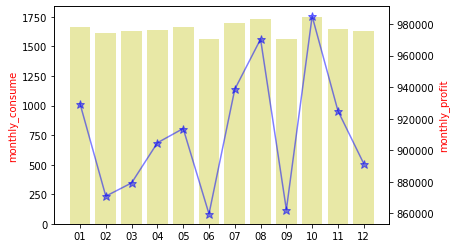

<Figure size 648x648 with 0 Axes>

In [166]:
y=month_id['transaction_id']
x=pd.Series(month_id.index.values)


fig,ax1=plt.subplots()
plt.figure(figsize=(9, 9))
ax1.bar(x=month_id.index,height=month_id.transaction_id,color='y',alpha=0.35)
ax2=ax1.twinx()
ax2.plot(month_id.profit,marker='*',markersize=9,color='blue',alpha=0.5)
ax1.set_ylabel('monthly_consume',color='r')
ax2.set_ylabel('monthly_profit', color='r')
#Prompt: JULY/AUGUST/OCTOBER are the key months required to be focused on
F,P=stats.f_oneway(
    pd.DataFrame(transaction_clear[transaction_clear['month']=='01']['profit']),
    pd.DataFrame(transaction_clear[transaction_clear['month']=='02']['profit']),
    pd.DataFrame(transaction_clear[transaction_clear['month']=='03']['profit']),
    pd.DataFrame(transaction_clear[transaction_clear['month']=='04']['profit']),
    pd.DataFrame(transaction_clear[transaction_clear['month']=='05']['profit']),
    pd.DataFrame(transaction_clear[transaction_clear['month']=='06']['profit']),
    pd.DataFrame(transaction_clear[transaction_clear['month']=='07']['profit']),
    pd.DataFrame(transaction_clear[transaction_clear['month']=='08']['profit']),
    pd.DataFrame(transaction_clear[transaction_clear['month']=='09']['profit']),
    pd.DataFrame(transaction_clear[transaction_clear['month']=='10']['profit']),
    pd.DataFrame(transaction_clear[transaction_clear['month']=='11']['profit']),
    pd.DataFrame(transaction_clear[transaction_clear['month']=='12']['profit'])
)
print(f'The F-value is {F}and P-value is {P}')

Per value

In [124]:
customer_value=transaction_clear.groupby(['customer_id']).agg({'transaction_id':'count','list_price':'sum'})

In [67]:
customer_value['per_value']=customer_value['list_price']/customer_value['transaction_id']

,transaction_id,list_price,per_value
customer_id,,,
1065,0.800283,0.836106,0.721011
2967,0.800434,0.836320,0.721416
717,0.800737,0.836534,0.721619
1320,0.801040,0.836748,0.721821
1193,0.801242,0.836962,0.722125
...,...,...,...
2423,0.999697,0.999978,0.999921
3189,0.999798,0.999987,0.999947
2274,0.999899,0.999994,0.999966


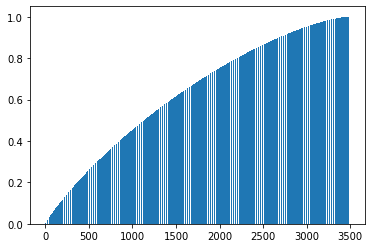

In [123]:
customer_value_sort=customer_value.sort_values(by='list_price',ascending=False)
customer_value_sort.rename(columns={'transaction_id':'order_amount'})
# customer_value_sort['accumulate']=np.cumsum(customer_value_sort['list_price'])
customer_value_sort_percentage=customer_value_sort.apply(lambda x:x.cumsum()/x.sum())


x=range(3494)
per=customer_value_sort_percentage['list_price']

plt.bar(x,height=per)
customer_value_sort_percentage[customer_value_sort_percentage['transaction_id']>=0.8]

In [122]:
n=round(3494*0.2,0)
customer_value_sort_percentage.iloc[699]

transaction_id    0.305307
list_price        0.341774
per_value         0.228836
Name: 3014, dtype: float64

In [106]:
per_order=round(customer_value['transaction_id'].mean(),3)
per_value=round(customer_value['list_price'].mean(),3)
per_order_value=round(customer_value['per_value'].mean(),3)
print(f'The average amount of order is {per_order}\nAverage value is {per_value} \nAverage per order is {per_order_value}')

The average amount of order is 5.668
Average value is 6279.817 
Average per order is 1106.225


In [125]:
first_sold=transaction_clear.groupby(['customer_id','brand']).agg({'product_first_sold_date':'min'})

In [127]:
first=first_sold.groupby(by='customer_id').apply(lambda x:x.sort_values('product_first_sold_date',ascending=True).head(1))
first

,,,product_first_sold_date
customer_id,customer_id,brand,
1,1,Norco Bicycles,1991-08-05
2,2,WeareA2B,2002-03-22
3,3,Trek Bicycles,1998-12-16
4,4,Solex,1993-06-23
5,5,WeareA2B,1991-05-06
...,...,...,...
3497,3497,Solex,1996-04-05
3498,3498,OHM Cycles,1994-08-10
3499,3499,WeareA2B,1993-06-23


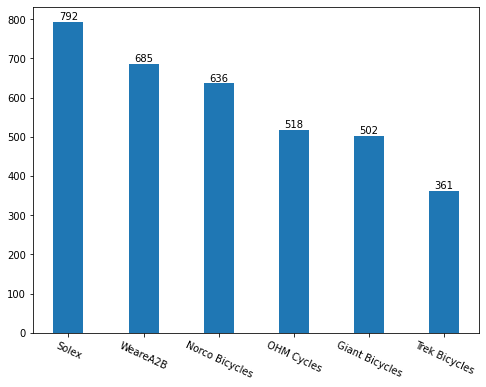

In [151]:
firstdf=first.groupby('brand').count().sort_values(by='product_first_sold_date',ascending=False)
firstdf.rename(columns={'product_first_sold_date':'amount'},inplace=True)
name=list(firstdf.index)
i=firstdf['amount']

plt.figure(figsize=(8,6))
x=range(6)
plt.bar(x,height=i,width=0.4)
_=plt.xticks(x,name)
plt.xticks(rotation=-25) 
for x, y in enumerate(firstdf['amount'].values):
    plt.text(x, y+1,y,ha='center', va='bottom')
    
#Solex/ Weare A2B and Noroc are first three choice for customer when they chosing their first bicycle

In [132]:
transaction_clear.groupby(['customer_id']).agg({'brand':'count'}).mean()
#The Bicycle ownership per capita is 5.667

brand    5.667716
dtype: float64

In [5]:
customer_demographic=pd.read_excel('C:/Users/Mr.Xiao/Desktop/KPMG_VI_New_raw_data_update_final.xlsx',3,skiprows=[0])

In [6]:
customer_merge=pd.merge(transaction_clear,customer_demographic,left_on='customer_id',right_on='customer_id')

In [7]:
customer_demographic

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [11]:
customer_merge['gender'].unique()


array(['Male', 'Female', 'U'], dtype=object)

In [9]:
customer_merge.replace('M','Male',inplace=True)

In [10]:
customer_merge.replace('F','Female',inplace=True)
customer_merge.replace('Femal','Female',inplace=True)

In [175]:
female=[]
male=[]
dataset=[]
for index,i in enumerate(customer_merge.groupby(['gender','wealth_segment'])['customer_id'].count()):
    if index<=2:
        female.append(i)
    if index>2 and index<=5:
        male.append(i)
    
dataset.append(female)
dataset.append(male)
dataset
    

[[2340, 2490, 5091], [2380, 2441, 4612]]

In [176]:
gender_table=pd.DataFrame(data=dataset,index=['female','male'],columns=['Affluent','High Net Worth','Mass'])

In [177]:
chi=chi2_contingency(gender_table)
print('Chi_Square value=%.4f, p-value=%.4f, degree of freedom=%i expected_frep=%s'%chi)
#The output can not reject the null hypothesis, thus, we have no enough evidence to conclude that there is correlationship between ownership of car and customer value

Chi_Square value=12.1754, p-value=0.0023, degree of freedom=2 expected_frep=[[2419.50604526 2527.6661672  4973.82778754]
 [2300.49395474 2403.3338328  4729.17221246]]


In [196]:
gender_table_percentage=gender_table.apply(lambda x:round(x*100/x.sum(),2),axis=1)
gender_table_percentage

,Affluent,High Net Worth,Mass
female,23.59,25.10,51.32
male,25.23,25.88,48.89


In [192]:
x=gender_table_percentage.iloc[0,:]
y=gender_table_percentage.iloc[1,:]
gender_table.columns

Index(['Affluent', 'High Net Worth', 'Mass'], dtype='object')

([<matplotlib.axis.XTick at 0x241b4850788>,
 [Text(0, 0, 'Affluent'), Text(1, 0, 'High Net Worth'), Text(2, 0, 'Mass')])

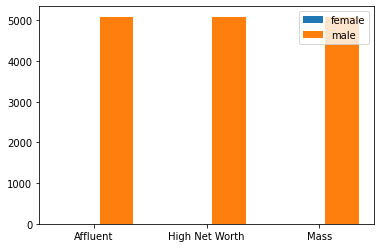

In [190]:
series=range(3)
name=['Affluent', 'High Net Worth', 'Mass']
plt.bar(x=[i - 0.2 for i in series],height=x,width=0.3,align='center',label='female')
plt.bar(x=[i + 0.2 for i in series],height=y,width=0.3,align='center',label='male')
plt.legend()
plt.xticks(series,name)

# for x, y in enumerate(gender_table['female'].values):
#      plt.text(x, y+1,y,ha='center', va='bottom')
#There is a significant difference between gender, the male customer are representing higher value 

In [197]:
job_industry=customer_merge.groupby(['job_industry_category']).agg({'past_3_years_bike_related_purchases':'mean','customer_id':'nunique'})

In [202]:
job_industry.sort_values(by='customer_id',ascending=False,inplace=True)

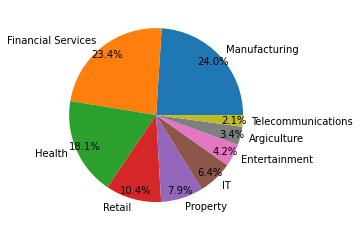

In [203]:
amount=job_industry['customer_id']
_=plt.pie(x=amount,labels=job_industry.index,pctdistance=0.9,autopct= '%1.1f%%')


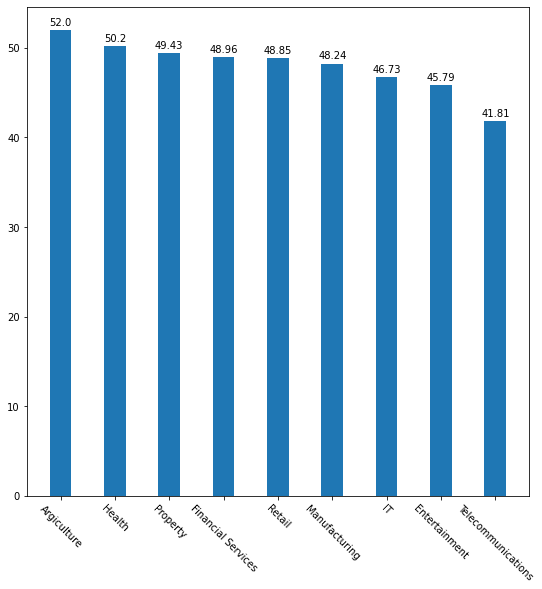

In [225]:
job_industry.sort_values(by='past_3_years_bike_related_purchases',ascending=False,inplace=True)
x=round(job_industry['past_3_years_bike_related_purchases'],1)
plt.figure(figsize=(9, 9))
plt.xticks(rotation=-45)   
plt.bar(x=job_industry.index,height=x,width=0.4)
for x,y in enumerate(job_industry['past_3_years_bike_related_purchases'].values):
    plt.text(x,y+0.3,round(y,2),ha='center',va='bottom')

In [388]:
address=pd.read_excel('C:/Users/Mr.Xiao/Desktop/KPMG_VI_New_raw_data_update_final.xlsx',4,skiprows=[0])


In [15]:
customer_address=pd.merge(transaction_clear,address,left_on='customer_id',right_on='customer_id')

In [16]:
customer_address['state'].replace('New South Wales','NSW',inplace=True)
customer_address['state'].replace('Victoria','VIC',inplace=True)

In [27]:
position=customer_address.groupby(['state','postcode']).agg({'customer_id':'nunique'})
position.rename(columns={'customer_id':'consumer_amount'},inplace=True)

In [61]:
position.groupby('state').agg({'sum','mean'})
position

consumer_amount
state postcode                 
NSW   2000                    7
      2007                    2
      2008                    1
      2009                    4
      2010                   12
...                         ...
VIC   3966                    1
      3975                    3
      3976                    6
      3977                   22
      3995                    3

[835 rows x 1 columns]

In [62]:
position.groupby('state').apply(lambda x:x.sort_values(by='consumer_amount',ascending=False).head(5))
#Below are the top 5 significant market in urban in each state required to be focused on

consumer_amount
state state postcode                 
NSW   NSW   2153                   28
            2170                   28
            2145                   27
            2155                   26
            2770                   24
QLD   QLD   4300                   16
            4503                   15
            4350                   15
            4670                   13
            4211                   12
VIC   VIC   3977                   22
            3630                   13
            3023                   12
            3175                   11
            3046                   11

In [65]:
position_sort=position.groupby('state').apply(lambda x:x.sort_values(by='consumer_amount',ascending=False))
position_takeup=position_sort.groupby('state').apply(lambda x: x.cumsum()/x.sum())
position_takeup.index


MultiIndex([('NSW', 'NSW', 2153),
            ('NSW', 'NSW', 2170),
            ('NSW', 'NSW', 2145),
            ('NSW', 'NSW', 2155),
            ('NSW', 'NSW', 2770),
            ('NSW', 'NSW', 2250),
            ('NSW', 'NSW', 2065),
            ('NSW', 'NSW', 2560),
            ('NSW', 'NSW', 2148),
            ('NSW', 'NSW', 2763),
            ...
            ('VIC', 'VIC', 3580),
            ('VIC', 'VIC', 3060),
            ('VIC', 'VIC', 3561),
            ('VIC', 'VIC', 3555),
            ('VIC', 'VIC', 3061),
            ('VIC', 'VIC', 3116),
            ('VIC', 'VIC', 3523),
            ('VIC', 'VIC', 3505),
            ('VIC', 'VIC', 3171),
            ('VIC', 'VIC', 3065)],
           names=['state', 'state', 'postcode'], length=835)

<AxesSubplot:>

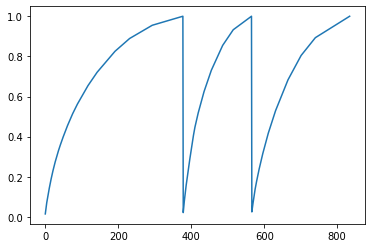

In [67]:
x=np.array(position_takeup['consumer_amount'])
sns.lineplot(data=x)


In [12]:
customer_list=pd.read_excel('C:/Users/Mr.Xiao/Desktop/KPMG_VI_New_raw_data_update_final.xlsx',1,skiprows=[0])
customer_list.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [13]:
customer_list[customer_list['online_order'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,2003-07-21
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,2005-05-10
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,2003-08-05
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,2015-05-21
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1997-01-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,2003-07-21
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,2013-03-12
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,2012-06-04
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,2004-01-16


In [10]:
customer_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [20]:
customer_list['product_first_sold_date'].min()

Timestamp('1991-01-21 00:00:00')

In [14]:
customer_list=pd.read_excel('C:/Users/Mr.Xiao/Desktop/KPMG_VI_New_raw_data_update_final.xlsx',4,skiprows=[0])
customer_list.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [3]:
customer_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [15]:
customer_list['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [37]:
customer_list['deceased_indicator'].unique()

array(['N', 'Y'], dtype=object)

In [351]:
year_table=customer_merge.groupby(['year']).agg({'customer_id':'nunique','list_price':'mean'})


In [348]:
customer_merge['year']=2022-pd.to_datetime(customer_merge['DOB']).dt.year

In [377]:
year_table.rename(columns={'list_price':'average_consume'},inplace=True)

In [354]:
customer_merge['DOB'].replace(list(customer_merge[pd.to_datetime(customer_merge['DOB']).dt.year<=1900]['DOB']),pd.to_datetime('1943-12-21'),inplace=True)

,customer_id,list_price
year,,
20.0,6,1386.371538
21.0,29,1110.064850
22.0,38,1134.100439
23.0,52,1063.395123
24.0,71,1180.763409
25.0,63,1102.303989
26.0,57,1107.611379
27.0,87,1116.532458
28.0,65,1061.621127


In [364]:
year_table=round(year_table,2)

Text(0, 0.5, 'average_consume')

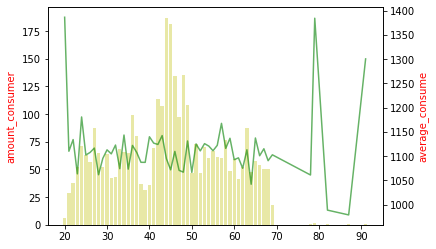

<Figure size 648x648 with 0 Axes>

In [386]:
old=year_table.index
num=year_table['customer_id']
price=year_table['average_consume']
fig,ax1=plt.subplots()
plt.figure(figsize=(9, 9))
ax1.bar(x=old,height=num,color='y',alpha=0.35)
ax2=ax1.twinx()
ax2.plot(price,color='green',alpha=0.6)
ax1.set_ylabel('amount_consumer',color='r')
ax2.set_ylabel('average_consume', color='r')

In [10]:
customer_merge

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19795,18735,45,3168,2017-02-21,1.0,Approved,Solex,Standard,medium,medium,...,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,N,Ì¦HÍÌ¬Ì¤ÌÌ¤eÍ ÍÌÌ¥ÌÌ»ÍÌwÌhÌÌ¯ÍoÌÍÌÍÌ±Ì® ÒÌºÌÌÌ...,No,22.0
19796,18789,83,3168,2017-04-11,0.0,Approved,Solex,Touring,medium,large,...,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,N,Ì¦HÍÌ¬Ì¤ÌÌ¤eÍ ÍÌÌ¥ÌÌ»ÍÌwÌhÌÌ¯ÍoÌÍÌÍÌ±Ì® ÒÌºÌÌÌ...,No,22.0
19797,19113,3,3168,2017-06-03,0.0,Approved,Trek Bicycles,Standard,medium,large,...,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,N,Ì¦HÍÌ¬Ì¤ÌÌ¤eÍ ÍÌÌ¥ÌÌ»ÍÌwÌhÌÌ¯ÍoÌÍÌÍÌ±Ì® ÒÌºÌÌÌ...,No,22.0
19798,19912,3,3168,2017-09-30,0.0,Approved,Trek Bicycles,Standard,medium,large,...,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,N,Ì¦HÍÌ¬Ì¤ÌÌ¤eÍ ÍÌÌ¥ÌÌ»ÍÌwÌhÌÌ¯ÍoÌÍÌÍÌ±Ì® ÒÌºÌÌÌ...,No,22.0


In [11]:
customer_address=pd.read_excel('C:/Users/Mr.Xiao/Desktop/KPMG_VI_New_raw_data_update_final.xlsx',4,skiprows=[0])
customer_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [12]:
pd.merge(transaction_clear,customer_address,left_on='customer_id',right_on='customer_id')

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,2003-02-07,448.68,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,2010-11-05,179.44,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,2011-04-16,451.65,4 Shopko Circle,2196,NSW,Australia,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19768,18735,45,3168,2017-02-21,1.0,Approved,Solex,Standard,medium,medium,441.49,84.99,2015-06-17,356.50,88 Rutledge Crossing,4215,QLD,Australia,7
19769,18789,83,3168,2017-04-11,0.0,Approved,Solex,Touring,medium,large,2083.94,675.03,2010-05-05,1408.91,88 Rutledge Crossing,4215,QLD,Australia,7
19770,19113,3,3168,2017-06-03,0.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2003-07-21,1702.55,88 Rutledge Crossing,4215,QLD,Australia,7
19771,19912,3,3168,2017-09-30,0.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2013-09-16,1702.55,88 Rutledge Crossing,4215,QLD,Australia,7


In [16]:
rfmtable=customer_merge.groupby(by='customer_id').agg({'transaction_id':'count','profit':'sum','transaction_date':'min'})

In [21]:
rfmtable['F_value'][rfmtable['transaction_id']>rfmtable.transaction_id.quantile(q=0.5)]=1
rfmtable['F_value'][rfmtable['transaction_id']<=rfmtable.transaction_id.quantile(q=0.5)]=0

In [20]:
rfmtable['F_value']=0
rfmtable['R_value']=0
rfmtable['M_value']=0

In [22]:
rfmtable['M_value'][rfmtable['profit']>rfmtable.profit.quantile(q=0.5)]=1
rfmtable['M_value'][rfmtable['profit']<=rfmtable.profit.quantile(q=0.5)]=0

In [23]:
rfmtable['R']=datetime.datetime.strptime('2017-12-31','%Y-%m-%d')-pd.to_datetime(rfmtable.transaction_date)

In [24]:
rfmtable['R_value'][rfmtable['R']>rfmtable.R.quantile(q=0.5)]=0
rfmtable['R_value'][rfmtable['R']<=rfmtable.R.quantile(q=0.5)]=1

In [25]:
rfmtable['R']=rfmtable['R'].map(lambda x: str(x).replace('days 00:00:00',''))
rfmtable['R']=rfmtable['R'].astype('int')

In [29]:
rfmtable['RFMcategory'][(rfmtable['R_value']==1)&(rfmtable['F_value']==1)&(rfmtable['M_value']==1)]='HHH'
rfmtable['RFMcategory'][(rfmtable['R_value']==1)&(rfmtable['F_value']==0)&(rfmtable['M_value']==1)]='HLH'
rfmtable['RFMcategory'][(rfmtable['R_value']==1)&(rfmtable['F_value']==1)&(rfmtable['M_value']==0)]='HHL'
rfmtable['RFMcategory'][(rfmtable['R_value']==1)&(rfmtable['F_value']==0)&(rfmtable['M_value']==0)]='HLL'
rfmtable['RFMcategory'][(rfmtable['R_value']==0)&(rfmtable['F_value']==1)&(rfmtable['M_value']==1)]='LHH'
rfmtable['RFMcategory'][(rfmtable['R_value']==0)&(rfmtable['F_value']==0)&(rfmtable['M_value']==1)]='LLH'
rfmtable['RFMcategory'][(rfmtable['R_value']==0)&(rfmtable['F_value']==1)&(rfmtable['M_value']==0)]='LHL'
rfmtable['RFMcategory'][(rfmtable['R_value']==0)&(rfmtable['F_value']==0)&(rfmtable['M_value']==0)]='LLL'

In [289]:
rfmtable['RFMcategory']=''

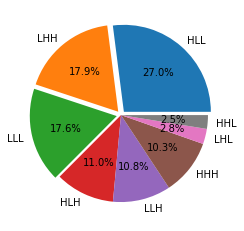

In [30]:
_=plt.pie(x=rfmtable.RFMcategory.value_counts(),explode=(0.05,0.05,0.05,0,0,0,0,0),
          labels=rfmtable.RFMcategory.value_counts().index,
          autopct='%1.1f%%')


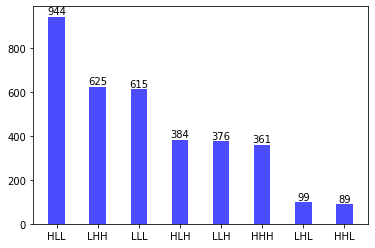

In [329]:
plt.bar(height=rfmtable.RFMcategory.value_counts(),x=rfmtable.RFMcategory.value_counts().index,width=0.4,alpha=0.7,color='blue')
for x, y in enumerate(rfmtable.RFMcategory.value_counts()):
    plt.text(x, y+1,y,ha='center', va='bottom')

In [31]:
rfmtable

,transaction_id,profit,transaction_date,F_value,R_value,M_value,R,RFM_category,RFMcategory
customer_id,,,,,,,,,
1,11,3018.09,2017-01-05,1,0,1,360,,LHH
2,3,2226.26,2017-05-04,0,1,0,241,,HLL
3,8,3362.81,2017-02-23,1,1,1,311,,HHH
4,2,220.57,2017-04-03,0,1,0,272,,HLL
5,6,2394.94,2017-03-03,0,1,0,303,,HLL
...,...,...,...,...,...,...,...,...,...
3496,4,2045.84,2017-03-07,0,1,0,299,,HLL
3497,3,1648.32,2017-09-01,0,1,0,121,,HLL
3498,6,3147.33,2017-02-03,0,0,1,331,,LLH


In [32]:
rfmtable=pd.merge(rfmtable,customer_merge.groupby(by='customer_id').agg({'gender':'max'}),left_index=True,right_index=True)

In [33]:
rfmgender=pd.pivot_table(rfmtable,index='RFMcategory',columns='gender',values='transaction_date',aggfunc='count')

In [49]:
rfmgender['F_percentage']=rfmgender.Female/(rfmgender.Female+rfmgender.Male)
rfmgender['M_percentage']=rfmgender.Male/(rfmgender.Female+rfmgender.Male)
rfmgender=rfmgender.round(2)

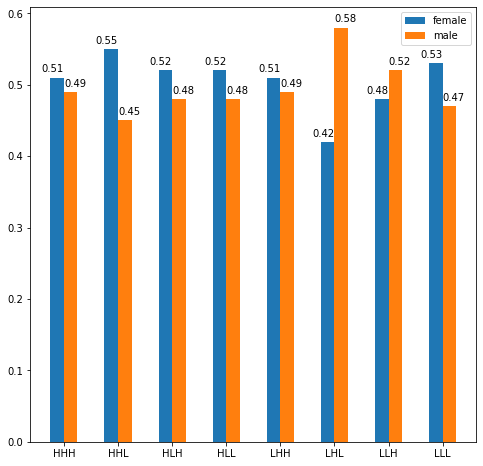

In [54]:
f=round(rfmgender.F_percentage,2)
m=round(rfmgender.M_percentage,2)
x=range(8)
plt.figure(figsize=(8,8))
cat=list(rfmgender.index)
plt.bar(x=[i-0.125 for i in x],height=f,width=0.25,label='female')
plt.bar(x=[i+0.125 for i in x],height=m,width=0.25,label='male')
plt.xticks(x,cat)
plt.legend()
for x, y in enumerate(rfmgender.F_percentage.values):
    plt.text(x, y+0.005,y,ha='right', va='bottom')
for x, y in enumerate(rfmgender.M_percentage.values):
    plt.text(x, y+0.005,y,ha='left', va='bottom')

In [395]:
rfmtable=pd.merge(rfmtable,customer_merge.groupby(by='customer_id').agg({'state':'max'}),left_index=True,right_index=True)

In [392]:
customer_merge=pd.merge(customer_merge,address,left_on='customer_id',right_on='customer_id')

In [393]:
customer_merge['state'].replace('New South Wales','NSW',inplace=True)
customer_merge['state'].replace('Victoria','VIC',inplace=True)

In [402]:
rfmstate=pd.pivot_table(rfmtable,index='RFMcategory',columns='state',values='transaction_date',aggfunc='count')

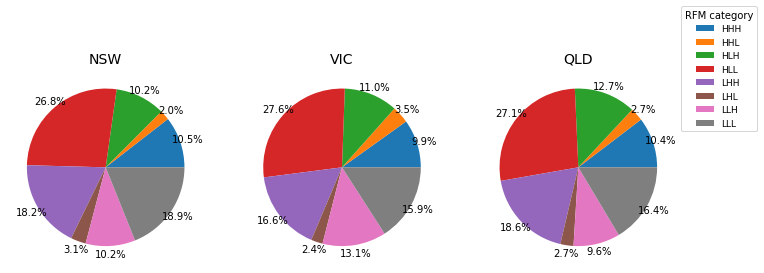

In [439]:
plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
_=plt.pie(rfmstate.NSW,autopct='%1.1f%%',pctdistance=1.1)
plt.title('NSW',size=14)
plt.subplot(1,3,2)
plt.title('VIC',size=14)
_=plt.pie(rfmstate.VIC,autopct='%1.1f%%',pctdistance=1.1)
plt.subplot(1,3,3)
plt.title('QLD',size=14)
_=plt.pie(rfmstate.QLD,autopct='%1customer_merge.groupby(by='customer_id').agg({'state':'max'}).1f%%',pctdistance=1.1)
plt.legend(list(rfmstate.index),#添加图例
          title="RFM category",
          loc="center left",
          fontsize=9,
          bbox_to_anchor=(1, 0.5, 0.5, 1))

In [443]:
customer_merge['category']=''

In [449]:
customer_merge['category']=customer_merge['customer_id'].map(rfmtable.RFMcategory)

In [461]:
brandtable=pd.DataFrame(customer_merge.groupby(by=['category','brand'])['transaction_id'].count())

In [472]:
brandtable=brandtable.groupby(by='category').apply(lambda x:x.sort_values('transaction_id',ascending=False).head(2))

In [485]:
brandtable.rename({'transaction_id':'amount'},axis=1)

amount
category category brand                 
HHH      HHH      Solex              674
                  Trek Bicycles      483
HHL      HHL      Solex              126
                  Norco Bicycles     118
HLH      HLH      WeareA2B           408
                  Solex              398
HLL      HLL      Solex              789
                  Giant Bicycles     588
LHH      LHH      Solex             1123
                  Giant Bicycles     907
LHL      LHL      Solex              164
                  OHM Cycles         139
LLH      LLH      WeareA2B           448
                  Solex              430
LLL      LLL      Solex              544
                  Giant Bicycles     470

In [79]:
customer_merge['year']=pd.to_datetime(customer_merge['DOB']).dt.year

In [82]:
customer_merge['year']=2022-customer_merge['year']

In [97]:
customer_merge['year_range'][customer_merge['year']<=25]='<25'
customer_merge['year_range'][(customer_merge['year']>25)&(customer_merge['year']<=35)]='26-35'
customer_merge['year_range'][(customer_merge['year']>35)&(customer_merge['year']<=45)]='36-45'
customer_merge['year_range'][(customer_merge['year']>45)&(customer_merge['year']<=55)]='46-55'
customer_merge['year_range'][(customer_merge['year']>55)&(customer_merge['year']<=65)]='56-65'
customer_merge['year_range'][(customer_merge['year']>65)]='>65'



In [86]:
customer_merge['year_range']=''

In [116]:
year_table=customer_merge.groupby(['year_range']).agg({'customer_id':'nunique','profit':'mean'})
year_table=year_table.reindex (['<25', '26-35', '36-45', '46-55', '56-65','>65'])

Text(0, 0.5, 'average_consume')

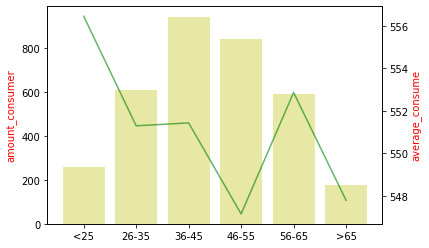

<Figure size 648x648 with 0 Axes>

In [117]:
old=year_table.index
num=year_table['customer_id']
price=year_table['profit']
fig,ax1=plt.subplots()
plt.figure(figsize=(9, 9))
ax1.bar(x=old,height=num,color='y',alpha=0.35)
ax2=ax1.twinx()
ax2.plot(price,color='green',alpha=0.6)
ax1.set_ylabel('amount_consumer',color='r')
ax2.set_ylabel('average_consume', color='r')

In [169]:
F,P=stats.f_oneway(
    pd.DataFrame(customer_merge[customer_merge['year_range']=='<25']['profit']),
    pd.DataFrame(customer_merge[customer_merge['year_range']=='26-35']['profit']),
    pd.DataFrame(customer_merge[customer_merge['year_range']=='36-45']['profit']),
    pd.DataFrame(customer_merge[customer_merge['year_range']=='46-55']['profit']),
    pd.DataFrame(customer_merge[customer_merge['year_range']=='56-65']['profit']),
    pd.DataFrame(customer_merge[customer_merge['year_range']=='>65']['profit'])
)
print(f'The F-value is {F}and P-value is {P}')

The F-value is [0.11190573]and P-value is [0.9897797]


,year_range,customer_id,profit
0,<25,259,556.461412
1,26-35,609,551.296450
2,36-45,941,551.431659
3,46-55,838,547.141216
4,56-65,592,552.866549
5,>65,178,547.781568
